# Visualising timeseries

Often need to visualise long timeseries data...

## Example data
We're going to be using HadCRUT4 version XXX monthly temperatures... add citation... explain that student will need to download this separately, can't redistribute

First we're going to load the data. Using both global and NH data (we'll see why below). File format is described here: XXX. Essential points are:

 * This is a text (ASCII) format, not binary
 * File consists of twelve columns, separated by spaces
 * There are no column headers
 * First column is the month in yyyy/mm format
 * Second column is the "best estimate" temperature for that month, computed as the median of 100 ensemble members
   * TODO explain anomaly
 * We don't need the other ten columns

Reading text files can be slightly tricky because of things like character encodings and newlines. Pandas library is a big help here (add link)

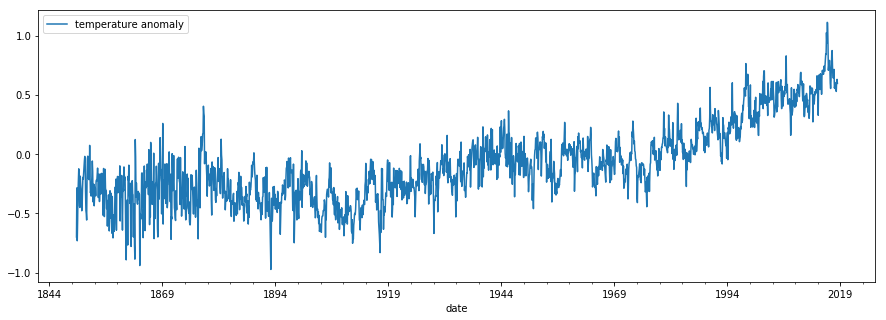

In [1]:
# Render our plots inline
%matplotlib inline

# Some standard imports
import pandas as pd
import matplotlib.pyplot as plt

# Make the default figures bigger
plt.rcParams['figure.figsize'] = (15, 5)

# Read the data
df = pd.read_csv('HadCRUT.4.6.0.0.monthly_ns_avg.txt',
                 delim_whitespace = True,                 # Columns are delimited by whitespace
                 index_col = 0,                           # First column is our "index", i.e. the unique row label
                 usecols = [0,1],                         # We only need the first two columns
                 names = ['date', 'temperature anomaly'], # We add our own column names
                 parse_dates = [0],                       # Dates are in the first column... 
                 date_parser = lambda d: pd.to_datetime(d, format='%Y/%m'))  # ... in the format year/month

# TODO: verify that we seem to have read this correctly
# Then make a simple plot

df.plot()

This quickview gives us an overall impression of the data and the general upward trend. But we can't really make out any variation *within* any given year. We could zoom in to different parts of the graph, but there's another kind of plot we can make that helps.

## Timeseries "heatmap"

If we use *two* axes of time, we can encode temperature anomalies as colours. In this way, we can separate out the variation *within a year* from the variation *from one year to the next*.

First we have to separate out the year and month into new columns. The date is contained in the *index* of the pandas dataframe

In [2]:
# Extract the year and add it to a new column
df['year'] = df.index.map(lambda d: d.year)
# Extract the month, create a nice label and adds it to a new column
df['month'] = df.index.map(lambda d: d.month) #strftime('%b'))
df[:10]

,temperature anomaly,year,month
date,,,
1850-01-01,-0.700,1850,1
1850-02-01,-0.286,1850,2
1850-03-01,-0.732,1850,3
1850-04-01,-0.563,1850,4
1850-05-01,-0.327,1850,5
1850-06-01,-0.213,1850,6
1850-07-01,-0.125,1850,7
1850-08-01,-0.237,1850,8
1850-09-01,-0.439,1850,9


Now we can plot temperature anomalies as a function of year and month. We're going to use the Seaborn library to do this (TODO insert link):

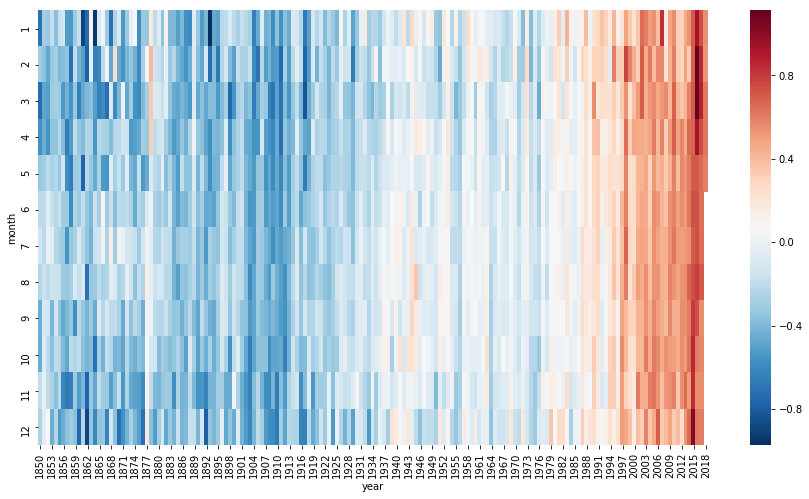

In [3]:
import seaborn as sns

heatmap_data = df.pivot(index='month', columns='year', values='temperature anomaly')

plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, cmap='RdBu_r') # Use a diverging colour scale as it is suitable for anomalies.
                                         # TODO Centralise it!